UNI- bs3118

Part 1 

---

1. Using the first approach of transfer learning, we get an accuracy of about 78% using the VGG16 convolution network. 
The second approach gives a 82% accuracy, but is slower. The output layers, activation functions, loss functions etc. have been changed for multiclass classification.

The methods are shown below.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

# The code in this notebook should work identically in TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!wget https://storage.googleapis.com/applied-dl/mini_flowers.zip \
    -O /tmp/mini_flowers.zip

--2019-03-04 20:59:58--  https://storage.googleapis.com/applied-dl/mini_flowers.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40110537 (38M) [application/zip]
Saving to: ‘/tmp/mini_flowers.zip’

/tmp/mini_flowers.z 100%[===================>]  38.25M  32.7MB/s    in 1.2s    

2019-03-04 21:00:00 (32.7 MB/s) - ‘/tmp/mini_flowers.zip’ saved [40110537/40110537]



In [0]:
local_zip = '/tmp/mini_flowers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
base_dir = '/tmp/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dand_dir = os.path.join(train_dir, 'dandelion')
train_rose_dir = os.path.join(train_dir, 'roses')
train_sun_dir = os.path.join(train_dir, 'sunflowers')
train_tulip_dir = os.path.join(train_dir, 'tulips')

validation_daisy_dir = os.path.join(validation_dir, 'daisy')
validation_dand_dir = os.path.join(validation_dir, 'dandelion')
validation_rose_dir = os.path.join(validation_dir, 'roses')
validation_sun_dir = os.path.join(validation_dir, 'sunflowers')
validation_tulip_dir = os.path.join(validation_dir, 'tulips')

num_daisy_tr = len(os.listdir(train_daisy_dir))
num_dand_tr = len(os.listdir(train_dand_dir))
num_rose_tr = len(os.listdir(train_rose_dir))
num_sun_tr = len(os.listdir(train_sun_dir))
num_tulip_tr = len(os.listdir(train_tulip_dir))


num_daisy_val = len(os.listdir(validation_daisy_dir))
num_dand_val = len(os.listdir(validation_dand_dir))
num_rose_val = len(os.listdir(validation_rose_dir))
num_sun_val = len(os.listdir(validation_sun_dir))
num_tulip_val = len(os.listdir(validation_tulip_dir))

total_train = num_daisy_tr + num_dand_tr + num_rose_tr + num_sun_tr + num_tulip_tr
total_val = num_daisy_val + num_dand_val + num_rose_val + num_sun_val + num_tulip_val

print('Training daisy images:', num_daisy_tr)
print('Training dandelion images:', num_dand_tr)
print('Training roses images:', num_rose_tr)
print('Training sunflowers images:', num_sun_tr)
print('Training tulips images:', num_tulip_tr)


print('Validation daisy images:', num_daisy_val)
print('Validation dandelion images:', num_dand_val)
print('Validation roses images:', num_rose_val)
print('Validation sunflowers images:', num_sun_val)
print('Validation tulips images:', num_tulip_val)

print("--")

print("Total training images:", total_train)
print("Total validation images:", total_val)

Training daisy images: 200
Training dandelion images: 200
Training roses images: 200
Training sunflowers images: 200
Training tulips images: 200
Validation daisy images: 100
Validation dandelion images: 100
Validation roses images: 100
Validation sunflowers images: 100
Validation tulips images: 100
--
Total training images: 1000
Total validation images: 500


In [6]:
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 3s 0us/step


In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [10]:
TARGET_SHAPE = 150
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255)

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,5))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(TARGET_SHAPE, TARGET_SHAPE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
      
        features_batch = conv_base.predict(inputs_batch)
        # print(features_batch.shape)
        # (32, 4, 4, 512)
        # Think: batch_size, rows, cols, channels
        
        features[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = features_batch
        labels[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = labels_batch
        i += 1
        if i * BATCH_SIZE >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            print("adfvsd")
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 1000)
validation_features, validation_labels = extract_features(validation_dir, 500)

Found 1000 images belonging to 5 classes.
adfvsd
Found 500 images belonging to 5 classes.
adfvsd


Train on 1000 samples, validate on 500 samples
Epoch 1/40
1000/1000 [==============================] - 1s 546us/sample - loss: 1.3369 - acc: 0.4830 - val_loss: 0.8998 - val_acc: 0.6480
Epoch 2/40
1000/1000 [==============================] - 0s 271us/sample - loss: 0.7314 - acc: 0.7270 - val_loss: 0.7632 - val_acc: 0.7180
Epoch 3/40
1000/1000 [==============================] - 0s 281us/sample - loss: 0.5229 - acc: 0.8110 - val_loss: 0.6378 - val_acc: 0.7600
Epoch 4/40
1000/1000 [==============================] - 0s 284us/sample - loss: 0.4335 - acc: 0.8520 - val_loss: 0.6664 - val_acc: 0.7400
Epoch 5/40
1000/1000 [==============================] - 0s 273us/sample - loss: 0.3317 - acc: 0.8860 - val_loss: 0.5727 - val_acc: 0.7900
Epoch 6/40
1000/1000 [==============================] - 0s 272us/sample - loss: 0.2736 - acc: 0.9130 - val_loss: 0.6106 - val_acc: 0.7640
Epoch 7/40
1000/1000 [==============================] - 0s 294us/sample - loss: 0.2216 - acc: 0.9280 - val_loss: 0.6767 - val

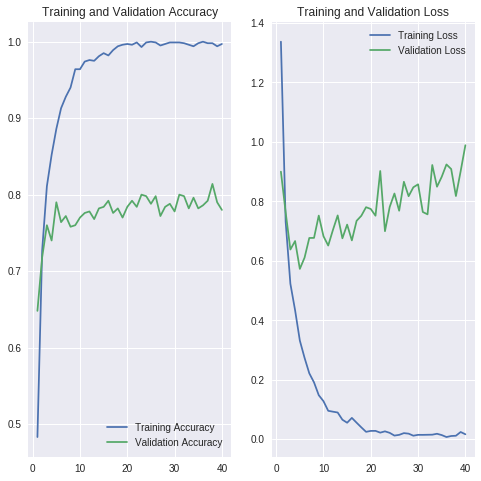

In [14]:
FLATTENED_SHAPE = 4 * 4 * 512

train_features = np.reshape(train_features, (total_train, FLATTENED_SHAPE))
validation_features = np.reshape(validation_features, (total_val, FLATTENED_SHAPE))
EPOCHS = 50
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=FLATTENED_SHAPE))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(validation_features, validation_labels))

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 2565      
Total params: 18,912,069
Trainable params: 4,197,381
Non-trainable params: 14,714,688
_________________________________________________________________
Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Epoch 1/40
16/16 [==============================] - 3s 183ms/step - loss: 0.7959 - acc: 0.7260
 - 11s - loss: 1.8292 - acc: 0.5040 - val_loss: 0.7959 - val_acc: 0.7260
Epo

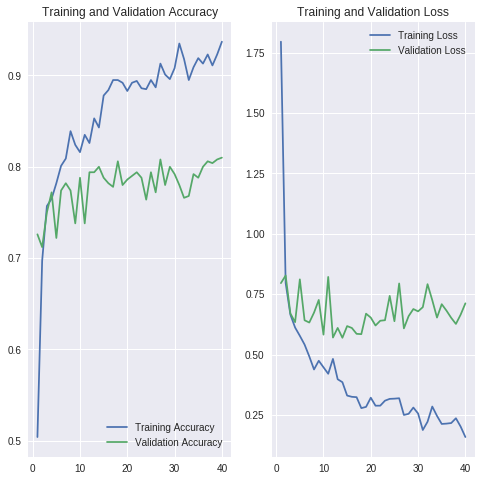

In [15]:
#Approach 2 
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()
conv_base.trainable = False

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')


image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Part 1 

---

2. Three convolution nets are used: InceptionV3, MobileNet, and Xception. 

  *  The accuracy from InceptionV3 is 82%
  *  The accuracy from MobileNet is 67.2%
  *  The accuracy from Xception is 77.4%

InceptionV3 is a very large network with the largest number of parameters and it also gives us the highest accuracy. 
Xception is an extension of Inception, but the convolutions are seperable depth-wise. MobileNet uses the fewest parameters but the accuracy decreases. 

Approach 2 is used to compare the three models. 



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_14 (Flatten)         (None, 51200)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               5120100   
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 505       
Total params: 26,923,389
Trainable params: 26,888,957
Non-trainable params: 34,432
_________________________________________________________________
Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Epoch 1/40
16/16 [==============================] - 13s 797ms/step - loss: 9.6971 - acc: 0.3800
 - 43s - loss: 10.0400 - acc: 0.3080 - val_loss: 9.6971 - val_acc: 0.3800
Epoc

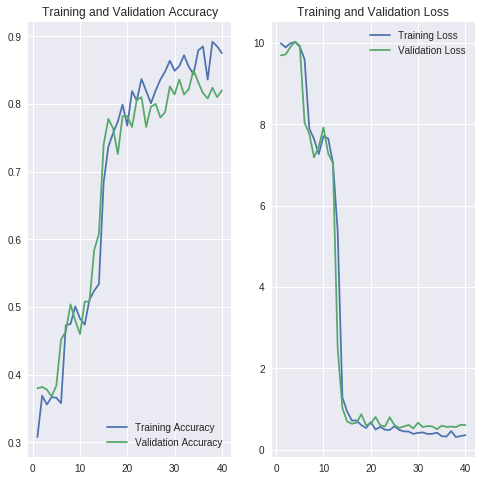

In [48]:
from tensorflow.keras.applications import InceptionV3
FLATTENED_SHAPE = 7 * 7 * 1024

TARGET_SHAPE = 224
BATCH_SIZE = 32

conv_base = InceptionV3(include_top=False, weights='imagenet',input_shape=(224, 224, 3))
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()
conv_base.trainable = False

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Now is a good time for a cup of coffee
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_8 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               26214912  
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 2565      
Total params: 47,078,957
Trainable params: 47,024,429
Non-trainable params: 54,528
_________________________________________________________________
Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Epoch 1/40
16/16 [==============================] - 5s 309ms/step - loss: 12.5469 - acc: 0.2080
 - 14s - loss: 12.4842 - acc: 0.1950 - val_loss: 12.5469 - val_acc: 0.2080
Epo

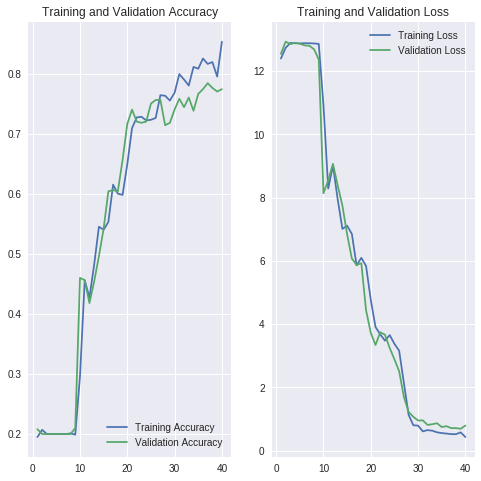

In [32]:
from tensorflow.keras.applications import Xception
FLATTENED_SHAPE = 4 * 4 * 512

train_features = np.reshape(train_features, (total_train, FLATTENED_SHAPE))
validation_features = np.reshape(validation_features, (total_val, FLATTENED_SHAPE))

conv_base = Xception(include_top=False, weights='imagenet',input_shape=(150, 150, 3))
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()
conv_base.trainable = False

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Now is a good time for a cup of coffee
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 1000 images belonging to 5 classes.
adfvsd
Found 500 images belonging to 5 classes.
adfvsd
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_12 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               25690624  
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 2565      
Total params: 28,922,053
Trainable params: 28,900,165
Non-trainable params: 21,888
_________________________________________________________________
Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Epoch 1/40
16/16 [==============================] - 5s 290ms/step - loss: 7.7

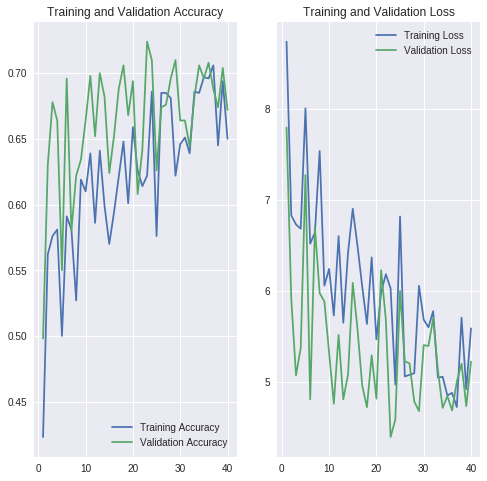

In [43]:
from tensorflow.keras.applications import MobileNet
FLATTENED_SHAPE = 7 * 7 * 1024

TARGET_SHAPE = 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255)

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 1024))
    labels = np.zeros(shape=(sample_count,5))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(TARGET_SHAPE, TARGET_SHAPE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
      
        features_batch = conv_base.predict(inputs_batch)
        # print(features_batch.shape)
        # (32, 4, 4, 512)
        # Think: batch_size, rows, cols, channels
        
        features[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = features_batch
        labels[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = labels_batch
        i += 1
        if i * BATCH_SIZE >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            print("adfvsd")
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 1000)
validation_features, validation_labels = extract_features(validation_dir, 500)


train_features = np.reshape(train_features, (total_train, FLATTENED_SHAPE))
validation_features = np.reshape(validation_features, (total_val, FLATTENED_SHAPE))
conv_base = MobileNet(input_shape=(224,224,3),alpha=1.0,depth_multiplier=1, dropout=1e-3, include_top=False, weights='imagenet', classes=5)

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()
conv_base.trainable = False

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode='categorical')

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=validation_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode='categorical')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Now is a good time for a cup of coffee
history = model.fit_generator(
      train_data_gen,
      steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
      epochs=EPOCHS,
      validation_data=val_data_gen,
      validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
      verbose=2)
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()